In [10]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [11]:
path = '../data_misc/eia_form923/**/EIA923_Schedules_2_3_4_5_M_12_*_Final_Revision.xlsx'
files = glob.glob(path)
files.append('../data_misc/eia_form923/f923_2013/EIA923_Schedules_2_3_4_5_2013_Final_Revision.xlsx')
years = np.arange(2012,2021,1).astype('int')
files.sort()
for x, y in zip(years, files):
    print(x,y)

2012 ../data_misc/eia_form923/f923_2012/EIA923_Schedules_2_3_4_5_M_12_2012_Final_Revision.xlsx
2013 ../data_misc/eia_form923/f923_2013/EIA923_Schedules_2_3_4_5_2013_Final_Revision.xlsx
2014 ../data_misc/eia_form923/f923_2014/EIA923_Schedules_2_3_4_5_M_12_2014_Final_Revision.xlsx
2015 ../data_misc/eia_form923/f923_2015/EIA923_Schedules_2_3_4_5_M_12_2015_Final_Revision.xlsx
2016 ../data_misc/eia_form923/f923_2016/EIA923_Schedules_2_3_4_5_M_12_2016_Final_Revision.xlsx
2017 ../data_misc/eia_form923/f923_2017/EIA923_Schedules_2_3_4_5_M_12_2017_Final_Revision.xlsx
2018 ../data_misc/eia_form923/f923_2018/EIA923_Schedules_2_3_4_5_M_12_2018_Final_Revision.xlsx
2019 ../data_misc/eia_form923/f923_2019/EIA923_Schedules_2_3_4_5_M_12_2019_Final_Revision.xlsx
2020 ../data_misc/eia_form923/f923_2020/EIA923_Schedules_2_3_4_5_M_12_2020_Final_Revision.xlsx


In [12]:
ot_plants = pd.read_csv('nuclear_plants_OT.csv')
codes = np.array(ot_plants['Plant Code'].values)
names = np.array(ot_plants['Plant Name'].values)

In [13]:
all_frames = []
# only include data from 2016 onward. Earlier data appears to have quality issues.
for yr, f in zip(years[4:], files[4:]):
    # read in the file
    df = pd.read_excel(f, 
                       skiprows=5, 
                       usecols=[0]+list(np.arange(55,67).astype('int'))+list(np.arange(79,91,1).astype('int')))
    # select plants of interest
    is_nuclear_plant = lambda x: x in codes
    df['is_npp'] = df['Plant Id'].apply(is_nuclear_plant)
    nuclear_df = df[df['is_npp'] == True]
    # group them together
    npp_groups = nuclear_df.groupby('Plant Id')
    year_frames = []
    for i, g in enumerate(npp_groups.groups):
#         if i > 0:
#             break
        plant = names[i]
        print(f'{plant} -- {yr}')
        df1 = npp_groups.get_group(g)
        df_in = df1.iloc[:,1:13]
        df_out = df1.iloc[:,13:-1]
        
        df_in_T = df_in.T
        df_in_T['elc_mmbtu_in'] = df_in_T.iloc[:,0:3].sum(axis=1)
        df_in_T['Year'] = yr
        df_in_T['Month'] = np.arange(1,13,1).astype('int')
        df_in_T['Day'] = 1
        df_in_T['Plant ID'] = g
        df_in_T.reset_index(drop=True, inplace=True)
        df_in_T = df_in_T[['elc_mmbtu_in', 'Year', 'Month', 'Day', 'Plant ID']]
        
        df_out_T = df_out.T
        df_out_T['elc_mwh_out'] = df_out_T.iloc[:,0:3].sum(axis=1)
        df_out_T['Year'] = yr
        df_out_T['Month'] = np.arange(1,13,1).astype('int')
        df_out_T['Day'] = 1
        df_out_T['Plant ID'] = g
        df_out_T.reset_index(drop=True, inplace=True)
        df_out_T = df_out_T[['elc_mwh_out', 'Year', 'Month', 'Day', 'Plant ID']]
        
        energy_df = df_in_T.merge(df_out_T, on=['Year','Month','Day', 'Plant ID'])
        year_frames.append(energy_df)
    year_df = pd.concat(year_frames, axis=0)
    all_frames.append(year_df)
full_df = pd.concat(all_frames, axis=0)

Browns Ferry -- 2016
Clinton Power Station -- 2016
Wolf Creek Generating Station -- 2016
Millstone -- 2016
Turkey Point -- 2016
Dresden Generating Station -- 2016
Quad Cities Generating Station -- 2016
Monticello Nuclear Facility -- 2016
Prairie Island -- 2016
PSEG Salem Generating Station -- 2016
Nine Mile Point Nuclear Station -- 2016
Peach Bottom -- 2016
H B Robinson -- 2016
Oconee -- 2016
Surry -- 2016
Point Beach Nuclear Plant -- 2016
Waterford 3 -- 2016
Donald C Cook -- 2016
Calvert Cliffs Nuclear Power Plant -- 2016
Brunswick Nuclear -- 2016
Braidwood Generation Station -- 2016
LaSalle Generating Station -- 2016
McGuire -- 2016
St Lucie -- 2016
Diablo Canyon -- 2016
James A Fitzpatrick -- 2016
Seabrook -- 2016
R E Ginna Nuclear Power Plant -- 2016
V C Summer -- 2016
Comanche Peak -- 2016
Sequoyah -- 2016
North Anna -- 2016
South Texas Project -- 2016
Cooper Nuclear Station -- 2016
Arkansas Nuclear One -- 2016
Indian Point 3 -- 2016
Browns Ferry -- 2017
Clinton Power Station -- 2

In [14]:
full_df

,elc_mmbtu_in,Year,Month,Day,Plant ID,elc_mwh_out
0,24545455.0,2016,1,1,46,2346937.0
1,20016211.0,2016,2,1,46,1913869.0
2,17609886.0,2016,3,1,46,1683786.0
3,25149560.0,2016,4,1,46,2404699.0
4,25806804.0,2016,5,1,46,2467542.0
...,...,...,...,...,...,...
7,7944334.0,2020,8,1,8907,760516.0
8,7769781.0,2020,9,1,8907,743806.0
9,8083871.0,2020,10,1,8907,773874.0
10,7865508.0,2020,11,1,8907,752970.0


In [15]:
npp_ts_groups = full_df.groupby('Plant ID')
for i, g in enumerate(npp_ts_groups.groups):
    cooling_path = f'cooling_data/{names[i].replace(" ","").lower()}_cooling.csv'
    cooling_data = pd.read_csv(cooling_path, index_col='date', parse_dates=True)
    power_data = npp_ts_groups.get_group(g)
    cols = ['Year', 'Month', 'Day']
    power_data['date'] = pd.to_datetime(power_data[cols])
    power_data.drop(columns=cols, inplace=True)
    power_data.set_index('date', drop=True, inplace=True)
    
    energy_data = cooling_data.merge(power_data, on=['date', 'Plant ID'])
    
    fname = f"energy_data/{names[i].replace(' ','').lower()}_energydata.csv"
    print(fname)
    energy_data.to_csv(fname)

energy_data/brownsferry_energydata.csv
energy_data/clintonpowerstation_energydata.csv
energy_data/wolfcreekgeneratingstation_energydata.csv
energy_data/millstone_energydata.csv
energy_data/turkeypoint_energydata.csv
energy_data/dresdengeneratingstation_energydata.csv
energy_data/quadcitiesgeneratingstation_energydata.csv
energy_data/monticellonuclearfacility_energydata.csv
energy_data/prairieisland_energydata.csv
energy_data/psegsalemgeneratingstation_energydata.csv
energy_data/ninemilepointnuclearstation_energydata.csv
energy_data/peachbottom_energydata.csv
energy_data/hbrobinson_energydata.csv
energy_data/oconee_energydata.csv
energy_data/surry_energydata.csv
energy_data/pointbeachnuclearplant_energydata.csv
energy_data/waterford3_energydata.csv
energy_data/donaldccook_energydata.csv
energy_data/calvertcliffsnuclearpowerplant_energydata.csv
energy_data/brunswicknuclear_energydata.csv
energy_data/braidwoodgenerationstation_energydata.csv
energy_data/lasallegeneratingstation_energydata

In [16]:
energy_data

,Plant ID,diversion_rate_kgM,withdrawal_rate_kgM,discharge_rate_kgM,consumption_rate_kgM,avg_intake_temp_C,max_intake_temp_C,avg_discharge_temp_C,max_discharge_temp_C,Nameplate Capacity (MW),Plant Name,State,max_withdrawal_rate_kgM,elc_mmbtu_in,elc_mwh_out
date,,,,,,,,,,,,,,,
2016-01-01,8907,0.0,8.433258e+10,8.433258e+10,0.0,2.222222,4.444444,17.222222,67.0,1012.0,Indian Point 3,NY,1.410266e+11,8114765.0,775901.0
2016-02-01,8907,0.0,7.355992e+10,7.355992e+10,0.0,1.111111,2.777778,14.444444,62.0,1012.0,Indian Point 3,NY,1.319281e+11,7590669.0,725789.0
2016-03-01,8907,0.0,8.382753e+10,8.382753e+10,0.0,1.666667,2.222222,12.222222,58.0,1012.0,Indian Point 3,NY,1.410266e+11,8098032.0,774301.0
2016-04-01,8907,0.0,6.934888e+10,6.934888e+10,0.0,7.222222,7.777778,20.555556,71.0,1012.0,Indian Point 3,NY,1.364773e+11,7687243.0,735023.0
2016-05-01,8907,0.0,5.851528e+10,5.851528e+10,0.0,16.111111,16.666667,26.111111,82.0,1012.0,Indian Point 3,NY,1.410266e+11,8109264.0,775375.0
2016-06-01,8907,0.0,1.294526e+11,1.294526e+11,0.0,21.666667,22.222222,32.222222,92.0,1012.0,Indian Point 3,NY,1.364773e+11,7804451.0,746230.0
2016-07-01,8907,0.0,1.390139e+11,1.390139e+11,0.0,24.444444,25.000000,35.000000,98.0,1012.0,Indian Point 3,NY,1.410266e+11,7942943.0,759472.0
2016-08-01,8907,0.0,1.387250e+11,1.387250e+11,0.0,26.666667,27.777778,37.777778,102.0,1012.0,Indian Point 3,NY,1.410266e+11,7897563.0,755133.0
2016-09-01,8907,0.0,9.945841e+10,9.945841e+10,0.0,26.111111,26.666667,36.111111,99.0,1012.0,Indian Point 3,NY,1.364773e+11,7694501.0,735717.0


<AxesSubplot:xlabel='date'>

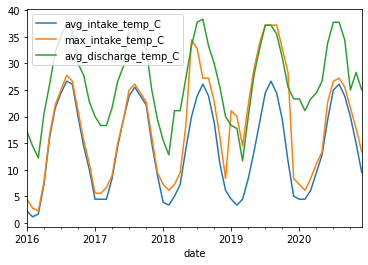

In [18]:
cooling_data.iloc[:,5:8].plot()